# Introduce Convolution Filter and Pooling

In [1]:
# Settings


## Convolution Filter

- Convolution filter is common image processing tool, and this technology is not restricted to the neural network computation. It is also available in Photoshop or other image/picture editing software.
- Convolution filter takes a numerical matrix, call __filter__ or __kernel__.
- Each pixel is modified to the convolution sum of surrounding pixels. Kernel matrix specifies the weight of the sum for each surrounding pixels.
    - This process modify the spatial frequency characteristics of an image.
- This idea can be used to distill important characteristics of an image, such as vertical line, horizontal line, or edges.

### Example Dataset (MNIST)

In [4]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
t = y_train
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#### Dataset Viasualize

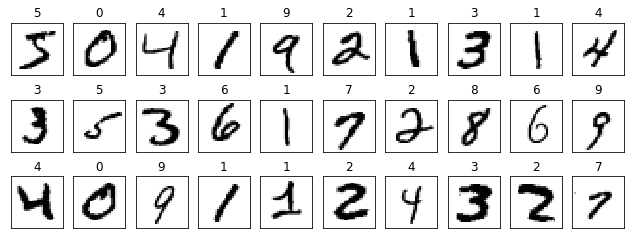

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(x_train[i].reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

### Kernel

In [6]:
# Prepare Filter
def edge_filter():
    filter0 = np.array(
            [[ 2, 1, 0,-1,-2],
             [ 3, 2, 0,-2,-3],
             [ 4, 3, 0,-3,-4],
             [ 3, 2, 0,-2,-3],
             [ 2, 1, 0,-1,-2]]) / 23.0
    filter1 = np.array(
            [[ 2, 3, 4, 3, 2],
             [ 1, 2, 3, 2, 1],
             [ 0, 0, 0, 0, 0],
             [-1,-2,-3,-2,-1],
             [-2,-3,-4,-3,-2]]) / 23.0
    
    filter_array = np.zeros([5,5,1,2])
    filter_array[:,:,0,0] = filter0
    filter_array[:,:,0,1] = filter1
    
    return filter_array # Input to tf.conv2d

#### Kernel Viasualization

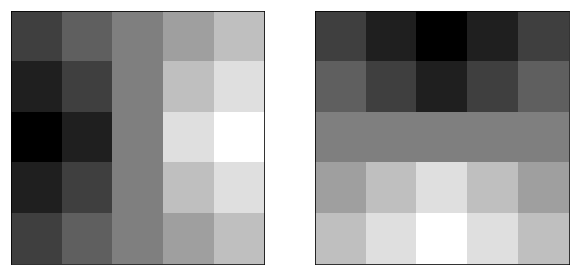

In [7]:
w_kernel = edge_filter();
fig = plt.figure(figsize=(10,5))

for i in range(2):
    subplot = fig.add_subplot(1, 2, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(w_kernel[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

### Convolution Filter with Keras

In [8]:
import keras
from keras import Sequential
from keras.layers import Conv2D
from keras import backend as K

In [13]:
def my_init(shape, dtype=None):
    return K.constant(edge_filter(), dtype='float32')

model = Sequential()
model.add(Conv2D(2, kernel_size=(5,5),
                 padding='SAME',
                 input_shape=(28,28,1),
                kernel_initializer = my_init
                ))

In [16]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 28, 28, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 2,
   'kernel_constraint': None,
   'kernel_initializer': 'my_init',
   'kernel_regularizer': None,
   'kernel_size': (5, 5),
   'name': 'conv2d_5',
   'padding': 'same',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}}]

In [21]:
result_image = model.predict(x_train[:30].reshape(30,28,28,1))

In [23]:
result_image.shape

(30, 28, 28, 2)

#### Visualize Result

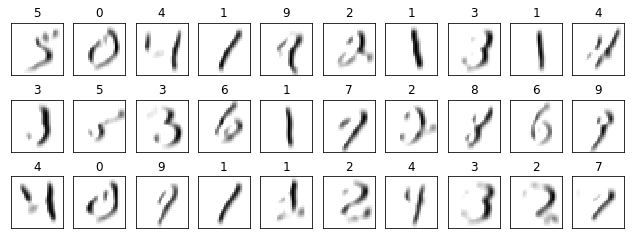

In [28]:
# Vertical Filter
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(result_image[i,:,:,0], vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

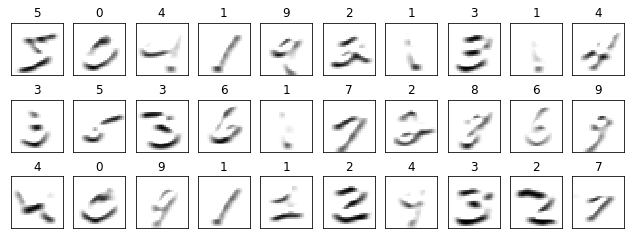

In [30]:
# Horizontal Filter
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(result_image[i,:,:,1], vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')